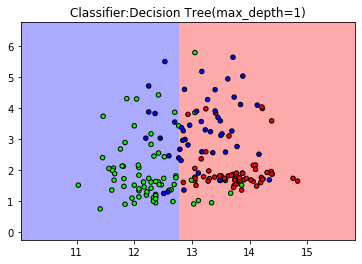

In [16]:
#决策树的原理是通过if...else对一系列问题进行推导，最终实现决策。
#下面采用酒的数据进行决策树的建模
#导入numpy
import numpy as np
#导入画图工具
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#导入tree模型和数据集加载工具
from sklearn import tree, datasets
#导入数据集拆分工具
from sklearn.model_selection import train_test_split
wine = datasets.load_wine()
#只选取数据集的前两个特征值
X = wine.data[:,:2]
y = wine.target
#将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y)
#现在完成了数据集的拆分，接下来开始用决策树分类器进行分类

#设定决策树分类器最大深度为1，决策树的深度代表的是问题的数量
clf = tree.DecisionTreeClassifier(max_depth=1)
#拟合训练集
clf.fit(X_train, y_train)

#查看分类器的表现
#定义图像中分区的颜色和散点的颜色
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#分别用样本的两个特征值创建图像的横轴和纵轴
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#给每个分类中的样本分配不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#用散点把样本表示出来
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolors='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Classifier:Decision Tree(max_depth=1)')

plt.show()
#可以看到还是有很多点被错误地分类，这是由于深度小导致的，试试增大深度为3、5下的情况。

#可以看到随着决策树最大深度的上升，分类器尽可能地将数据点放到正确的分类。

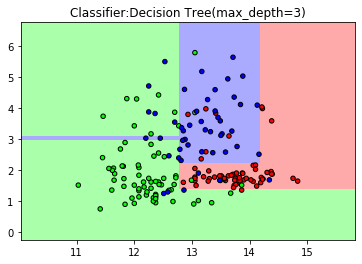

In [17]:
#设定决策树分类器最大深度为1，决策树的深度代表的是问题的数量
clf2 = tree.DecisionTreeClassifier(max_depth=3)
#拟合训练集
clf2.fit(X_train, y_train)

#查看分类器的表现
#定义图像中分区的颜色和散点的颜色
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#分别用样本的两个特征值创建图像的横轴和纵轴
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
#给每个分类中的样本分配不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#用散点把样本表示出来
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolors='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Classifier:Decision Tree(max_depth=3)')

plt.show()

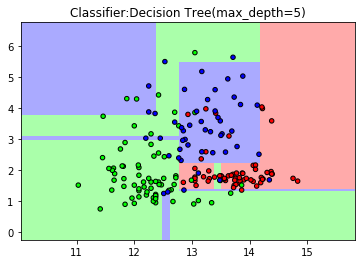

In [18]:
#设定决策树分类器最大深度为1，决策树的深度代表的是问题的数量
clf3 = tree.DecisionTreeClassifier(max_depth=5)
#拟合训练集
clf3.fit(X_train, y_train)

#查看分类器的表现
#定义图像中分区的颜色和散点的颜色
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#分别用样本的两个特征值创建图像的横轴和纵轴
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = clf3.predict(np.c_[xx.ravel(), yy.ravel()])
#给每个分类中的样本分配不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#用散点把样本表示出来
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolors='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Classifier:Decision Tree(max_depth=5)')

plt.show()

In [19]:
#想知道决策树具体的实现，可以通过graphviz工具来分析
#导入graphviz工具
import graphviz
#导入决策树中输出graphviz的接口
from sklearn.tree import export_graphviz
#选择最大深度为3的分类模型
export_graphviz(clf2, out_file="wine.dot", class_names=wine.target_names,
                feature_names=wine.feature_names[:2], impurity=False, filled=True)
#打开一个dot文件
with open("wine.dot") as f:
    dot_graph = f.read()
    #显示dot文件中的图像
    graphviz.Source(dot_graph)

In [20]:
#随机森林算法是一种集合学习方法，也可用于回归和分类。所谓集合学习方法指的是多个机器学习算法综合在一起，制造出一个更大的模型。
#比较流行的集合算法有随机森林(Random Tree)和梯度上升决策树(Gradient Boosted Decision Tree, GBDT)

#随机森林的构建
#导入机器学习库里面的集合学习算法中的随机森林模型
from sklearn.ensemble import RandomForestClassifier
#导入酒集合
wine = datasets.load_wine()
#选择前两个特征
X = wine.data[:,:2]
y = wine.target
#将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y)
#设定随机森林的树数为6
forest = RandomForestClassifier(n_estimators=6, random_state=3)
#使用模型拟合数据
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

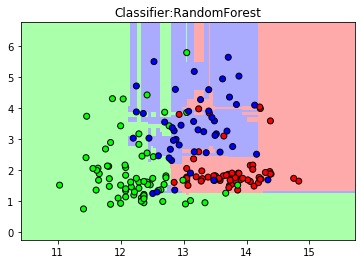

In [21]:
#定义图像中分区和散点的颜色
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#分别用样本的两个特征值创建图像的横纵坐标
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = forest.predict(np.c_[xx.ravel(), yy.ravel()])

#给每个分类分配颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#用散点图表示出来
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:RandomForest")

plt.show()

In [6]:
# 采用随机森林对成年人数据集进行分析
# 成年人数据集可以在这里下载，此外这个网站还有很多其他的数据集库
# https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
# 下载的文件类型是.data，只需要将其更改为.csv即可。

# 导入数据分析库
import pandas as pd
# 用pandas打开csv文件
adult_data = pd.read_csv('adult.csv', header=None, index_col=False,
                         names=['Age', 'Company Type', 'Weight', 'Education', 'Length of Education', 'Marital Status', 
                                'Career', 'Family Condition', 'Race', 'Gender', 'Assets Income', 'Assets Loss', 
                                'Working Hours per Week', 'Birthplace', 'Income per Year'])
# 为了方便，只选取其中一部分数据（特征值）
adult_data_lite = adult_data[['Age', 'Company Type', 'Education', 'Career', 'Gender', 'Working Hours per Week', 'Income per Year']]
# 查看数据是否被过滤成功
display(adult_data_lite.head())



,Age,Company Type,Education,Career,Gender,Working Hours per Week,Income per Year
0,39,State-gov,Bachelors,Adm-clerical,Male,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Male,13,<=50K
2,38,Private,HS-grad,Handlers-cleaners,Male,40,<=50K
3,53,Private,11th,Handlers-cleaners,Male,40,<=50K
4,28,Private,Bachelors,Prof-specialty,Female,40,<=50K


In [12]:
# 使用get_dummies将文本数据转化为虚拟数值
data_dummies = pd.get_dummies(adult_data_lite)
# 对比样本原始特征和虚拟变量特征
print('Sample Native Features:\n', list(adult_data_lite.columns), '\n')
print('Virtual Variable Features:\n', list(data_dummies.columns))

Sample Native Features:
 ['Age', 'Company Type', 'Education', 'Career', 'Gender', 'Working Hours per Week', 'Income per Year'] 

Virtual Variable Features:
 ['Age', 'Working Hours per Week', 'Company Type_ ?', 'Company Type_ Federal-gov', 'Company Type_ Local-gov', 'Company Type_ Never-worked', 'Company Type_ Private', 'Company Type_ Self-emp-inc', 'Company Type_ Self-emp-not-inc', 'Company Type_ State-gov', 'Company Type_ Without-pay', 'Education_ 10th', 'Education_ 11th', 'Education_ 12th', 'Education_ 1st-4th', 'Education_ 5th-6th', 'Education_ 7th-8th', 'Education_ 9th', 'Education_ Assoc-acdm', 'Education_ Assoc-voc', 'Education_ Bachelors', 'Education_ Doctorate', 'Education_ HS-grad', 'Education_ Masters', 'Education_ Preschool', 'Education_ Prof-school', 'Education_ Some-college', 'Career_ ?', 'Career_ Adm-clerical', 'Career_ Armed-Forces', 'Career_ Craft-repair', 'Career_ Exec-managerial', 'Career_ Farming-fishing', 'Career_ Handlers-cleaners', 'Career_ Machine-op-inspct', 'Ca

In [13]:
# 显示数据集中的前5行
data_dummies.head()


,Age,Working Hours per Week,Company Type_ ?,Company Type_ Federal-gov,Company Type_ Local-gov,Company Type_ Never-worked,Company Type_ Private,Company Type_ Self-emp-inc,Company Type_ Self-emp-not-inc,Company Type_ State-gov,...,Career_ Priv-house-serv,Career_ Prof-specialty,Career_ Protective-serv,Career_ Sales,Career_ Tech-support,Career_ Transport-moving,Gender_ Female,Gender_ Male,Income per Year_ <=50K,Income per Year_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [16]:
# 定义数据集的特征值
features = data_dummies.loc[:, 'Age':'Career_ Transport-moving']
# 将特征值赋值给X
X = features.values
# 将收入大于50K作为预测目标
y = data_dummies['Income per Year_ >50K'].values
print('Feature Shape: {}\n Tag Shape: {}\n'.format(X.shape, y.shape))


Feature Shape: (32561, 42)
 Tag Shape: (32561,)



In [21]:
from sklearn.model_selection import train_test_split
from sklearn import tree
# 使用决策树建模并做出决策
# 将数据拆分为训练集和测试集 随机每次都不同
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 用最大深度为5的随机森林拟合数据集的数据
adult_data_tree = tree.DecisionTreeClassifier(max_depth=5)
adult_data_tree.fit(X_train, y_train)
print('Module Score:{:.2f}'.format(adult_data_tree.score(X_test, y_test)))


Module Score:0.79


In [26]:
Mrs = [[28, 40, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0,]]
# 使用模型做出预测
dating_or_not = adult_data_tree.predict(Mrs)
if dating_or_not == 1:
    print("go!!!")
else:
    print("no!!!")


no!!!
